<a href="https://colab.research.google.com/github/tajbirahmed143/Problem-set-2-map2192/blob/main/Problem_set_2_map2192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [17]:
# Function to generate random filters
def generate_random_filters(num_filters, filter_size):
    filters = []
    for _ in range(num_filters):
        rand_filter = np.random.randn(filter_size, filter_size)
        filters.append(rand_filter)
    return filters

# Load the image from the URL
url = "https://o.aolcdn.com/images/dims3/GLOB/legacy_thumbnail/1062x597/format/jpg/quality/100/https://s.aolcdn.com/os/ab/_cms/2022/10/28094926/2023-toyota-supra-gt4-evo-2.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [18]:
# Show the shape of the color image
print("Shape of the color image:", np.array(img).shape)

# Resize the image to 224x224 pixels
new_size = (224, 224)
img = img.resize(new_size)

# Convert to grayscale
img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Show the shape of the grayscale image
print("Shape of the grayscale image:", img_gray.shape)

Shape of the color image: (597, 1062, 3)
Shape of the grayscale image: (224, 224)


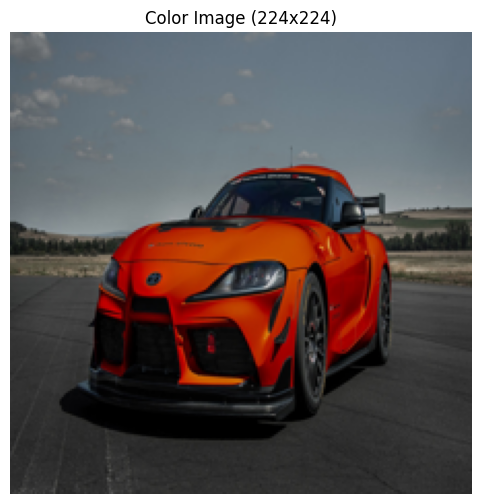

Shape of the grayscale image: (224, 224)


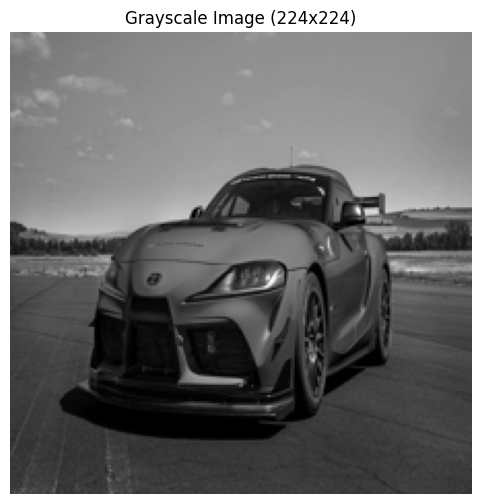

In [19]:
# Generate 10 random 5x5 filters
num_filters = 10
filter_size = 5
filters = generate_random_filters(num_filters, filter_size)

# Show the color image
plt.figure(figsize=(6, 6))
plt.imshow(np.array(img))
plt.axis('off')
plt.title('Color Image (224x224)')
plt.show()

# Show the shape of the grayscale image
print("Shape of the grayscale image:", img_gray.shape)

# Plot the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image (224x224)')
plt.show()


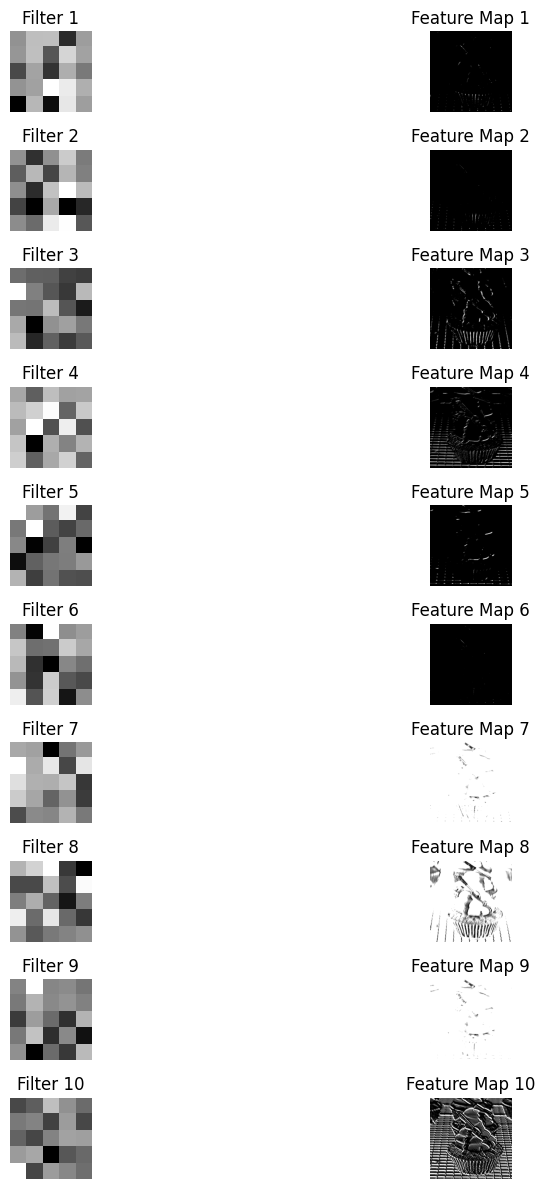

In [12]:
# Convolve the image with each filter and plot filter-feature map pairs
plt.figure(figsize=(12, 12))

for i, filter in enumerate(filters):
    feature_map = cv2.filter2D(img_gray, -1, filter)

    # Plot the filter
    plt.subplot(num_filters, 2, i * 2 + 1)
    plt.imshow(filter, cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i + 1}')

    # Plot the corresponding feature map
    plt.subplot(num_filters, 2, i * 2 + 2)
    plt.imshow(feature_map, cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i + 1}')

plt.tight_layout()
plt.show()